In [1]:
import __init__
import numpy as np
from engine import Noise,Heatmap,CombineNoises,gradient,colors
from noises import *
from utilities import *
from matplotlib import pyplot as plt
import matplotlib
RESOLUTION = 500

In [2]:
continent = norm(simplex(resolution=RESOLUTION, octaves=10, persistence=10.0, lacunarity=-0.03, seed=500))

def cut(matrix, threshold = 0):
	matrix[matrix <= threshold] = 0
	return matrix

def land_mass_distribution(points=2, radius=1, seed=1234):
	return (-worley(resolution=RESOLUTION, points=points, n=1, seed=seed) + 1) ** radius

def land_mass_shape(lacunarity = 0.0, seed = (0, 1000)):
	return simplex(resolution=RESOLUTION, octaves=4, persistence=2,
	lacunarity=lacunarity + 0.2, seed=seed)

def land_mass(clusters = 1, seed=123):
	alpha = 1.5
	if clusters == 1:
		clusters = continent
	else:
		clusters = land_mass_distribution(points=clusters, radius=3+clusters/10, seed=seed)
	return land_mass_shape(lacunarity=0, seed=seed) + alpha * clusters

def border_layer(temperature=20, cutoff=0):
	return cut(-heat(RESOLUTION, temperature, 250, 250), cutoff)

def archipelago(clusters = 1, beaches = 0.6, border = True, land = 0.3, seed = 1000):
	terrain = land_mass(clusters=clusters, seed=seed)-1
	if border:
		terrain -= border_layer(20)
		beaches -= 0.1

	terrain += land
	return norm(np.sign(terrain) * np.abs(terrain)**beaches)

Noise(archipelago, clusters=(1,100), beaches=(0.4, 0.8,0.01), land = 0.0, seed=(0, 5000), border=True, cbar=True, scale = 2.0)

interactive(children=(IntSlider(value=50, description='clusters', min=1), FloatSlider(value=0.6000000000000001…

In [3]:
MAINLAND = archipelago(clusters=1, beaches=0.8, land=0.5, seed=967, border=True)
ISLANDS = archipelago(clusters=10, beaches=0.8, land=0.2, seed=1581, border=True)

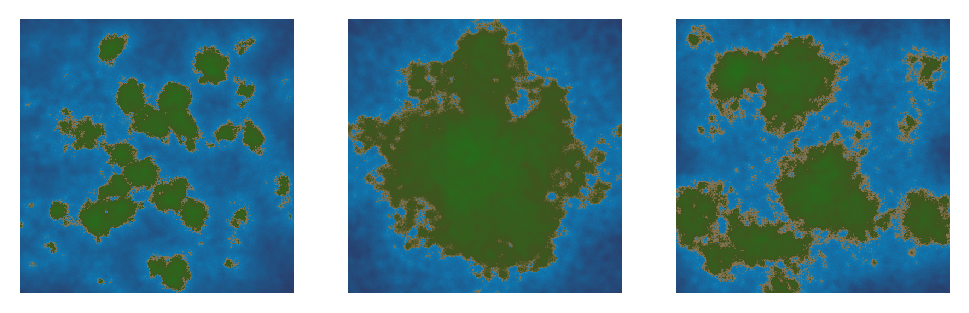

In [4]:
Heatmap(archipelago(clusters=50, beaches=0.6, land=0, seed=2500, border=True), MAINLAND, ISLANDS, scale=2.0)

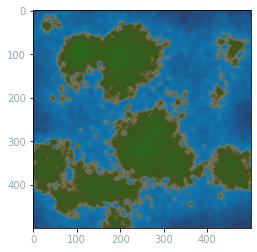

In [5]:
cmap = Colormap()(ISLANDS)
plt.imshow(cmap)

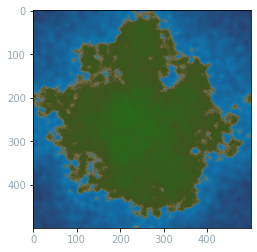

In [6]:
cmap = Colormap()(MAINLAND)
plt.imshow(cmap)

/home/ventus/Desktop/AI4Games-project/engine.py:16: UserWarning: Trying to register the cmap 'islands' which already exists.
  register_cmap(name=name, cmap=cmap)


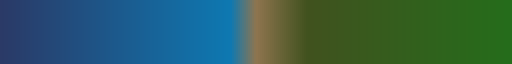

In [7]:
gradient(
    name="islands",
    colors=["#2B3A67", "#0E79B2", "#8F754F", "#41521F", "#256D1B"],
    ranges=[0.0, 0.45, 0.5, 0.6, 1.0],
)

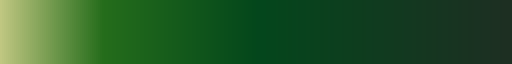

In [8]:
gradient(
    name="moisture",
    colors=["#C0C781", "#256D1B", "#04471C", "#1E2F23"],
    ranges=[0.0, 0.2, 0.5, 1.0],
)

/home/ventus/Desktop/AI4Games-project/engine.py:22: UserWarning: Trying to register the cmap 'peaks' which already exists.
  register_cmap(name=name, cmap=cmap)


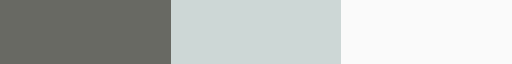

In [36]:
colors(
    name="peaks",
    colors=["#686963", "#CDD7D6", "#FAFAFA"]
)

In [37]:
def moisture(lacunarity = 0.0, seed = 1000):
	return simplex(resolution=RESOLUTION, octaves=4, persistence=2,
	lacunarity=lacunarity + 0.2, seed=seed)

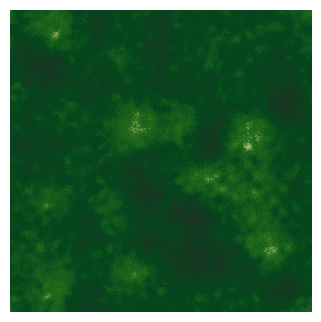

In [38]:
Heatmap(moisture(), cmap='moisture')

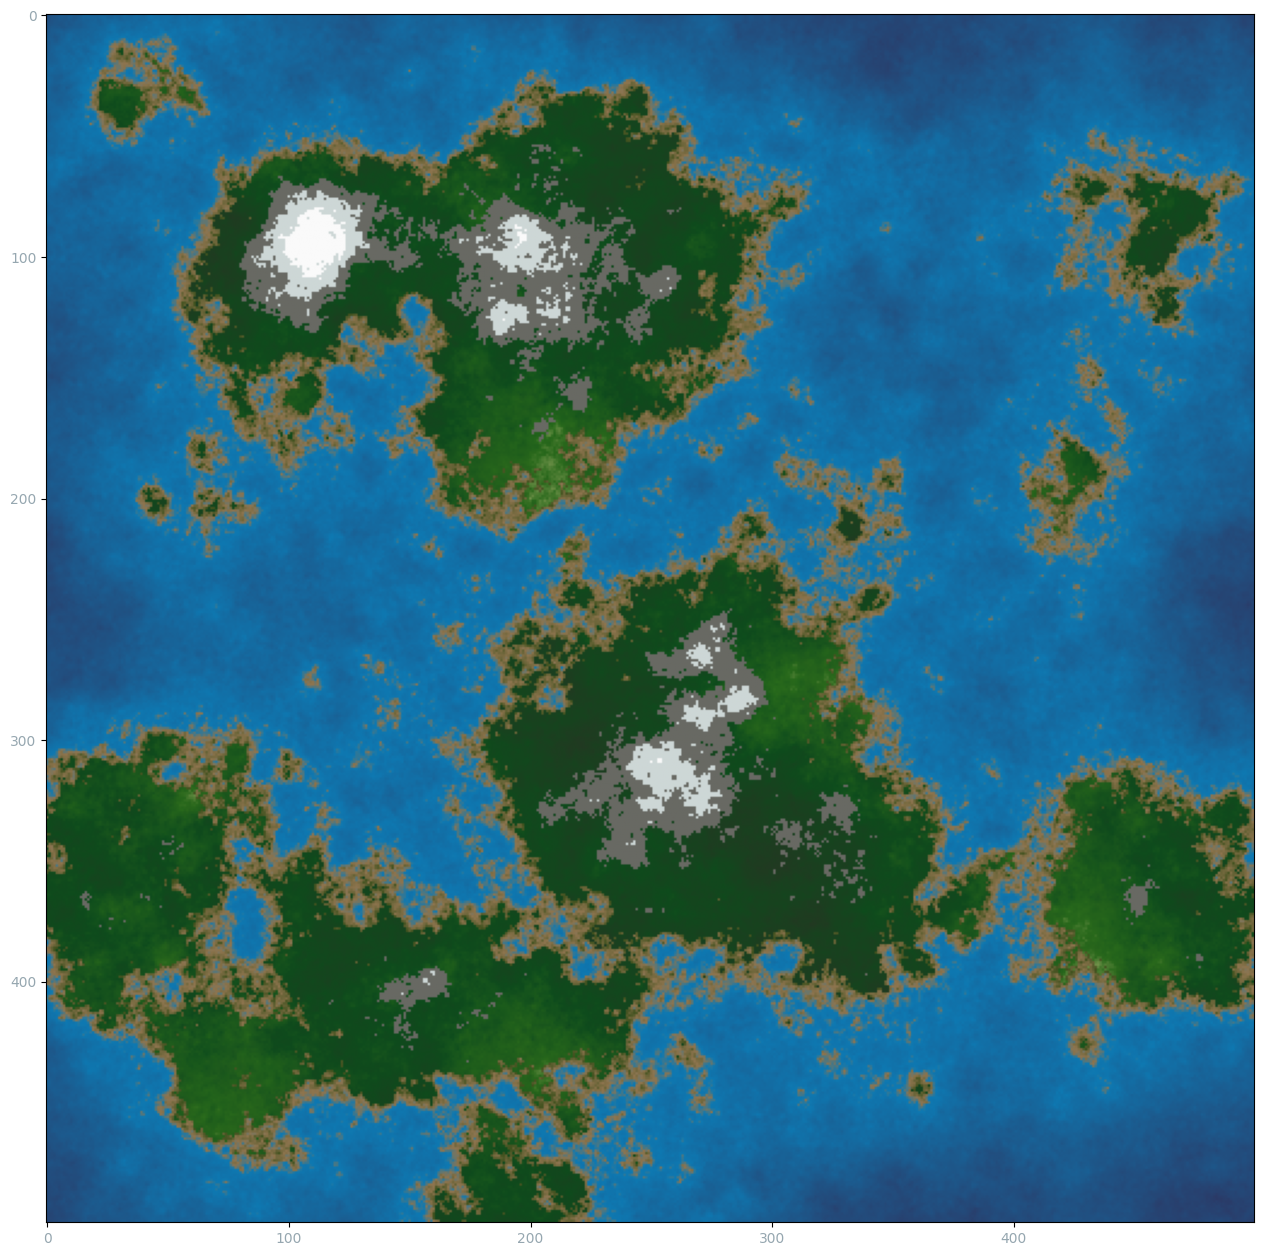

In [41]:
lc = Colormap()
mc = Colormap('moisture')
pc = Colormap('peaks')
land = ISLANDS
mstr = norm(moisture())

mountains = 0.8
res = np.zeros(shape=(RESOLUTION, RESOLUTION, 4))
for x, y in cells(land):
	tile = land[x, y]
	if tile > mountains:
		res[x, y] = pc(5 * (tile - mountains))
	elif tile > 0.6:
		res[x][y] = compose(lc(land[x, y]), mc(mstr[x, y]), ratio=0.2)
	else:
		res[x][y] = lc(land[x][y])

fig, ax = plt.subplots(figsize=(16, 16), dpi=100)
ax.imshow(res)